<a href="https://colab.research.google.com/github/dataforgoodfr/batch7_satellite_ges/blob/work-basis/notebooks/03_25_OCO2_Data_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
!pip install netCDF4
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
!pip install pyproj==1.9.6

# OCO2 - Data Exploration

Project for **Data For Good**, season 7. 

*By Quentin Kamenda*


---

## Introduction

Using Data from [OCO-2 Satellite](en.wikipedia.org/wiki/Orbiting_Carbon_Observatory_2), issued by the NASA. 

**TODO: Explanation**

## Getting and Exploring Data

Sample data can be accessed freely on the NASA Database, among other open data from several NASA sattelites.

We will be using CSV aggragated by *Benoit Courty*. The sample contains Data for the entire month of December 2019 (237MB).

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/My Drive/Data For Good - S7: Ministère & O-CO2/oco2_2019_12.csv", sep=";")
data.head()

sounding_id   latitude   longitude        xco2  xco2_uncert  orbit
0  2019120100401475 -74.449608 -147.438370  406.644867     0.629539  28801
1  2019120100401773 -74.289062 -147.508148  406.293152     0.505218  28801
2  2019120100401806 -74.278152 -147.729370  408.028839     0.439435  28801
3  2019120100433774 -63.759300 -156.219269  407.812469     0.387007  28801
4  2019120100480106 -49.472168 -162.097275  408.023682     0.605203  28801

In [0]:
data.describe()

sounding_id      latitude  ...   xco2_uncert         orbit
count  2.528809e+06  2.528809e+06  ...  2.528809e+06  2.528809e+06
mean   2.019122e+15 -7.162205e+00  ...  4.867411e-01  2.902197e+04
std    8.984320e+08  2.559929e+01  ...  1.282551e-01  1.308953e+02
min    2.019120e+15 -8.530780e+01  ...  6.670112e-03  2.880100e+04
25%    2.019121e+15 -2.785016e+01  ...  3.976190e-01  2.890800e+04
50%    2.019122e+15 -7.797689e+00  ...  4.571700e-01  2.902100e+04
75%    2.019122e+15  1.576880e+01  ...  5.399239e-01  2.913300e+04
max    2.019123e+15  5.233300e+01  ...  1.843246e+00  2.925100e+04

[8 rows x 6 columns]

##### Cutting the month data into 4 weeks:

In [0]:
end_week_1 = 2019120800000000
end_week_2 = 2019121500000000
end_week_3 = 2019122200000000
end_week_4 = 2019122900000000

data_1 = data[data['sounding_id'] < end_week_1]
data_2 = data[data['sounding_id'] < end_week_2]
data_2 = data_2[data['sounding_id'] > end_week_1]
data_3 = data[data['sounding_id'] < end_week_3]
data_3 = data_3[data['sounding_id'] > end_week_2]
data_4 = data[data['sounding_id'] < end_week_4]
data_4 = data_4[data['sounding_id'] > end_week_3]

print("Number of observations per week:")
print("Week 1: ", data_1.shape[0])
print("Week 2: ", data_2.shape[0])
print("Week 3: ", data_3.shape[0])
print("Week 4: ", data_4.shape[0])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Number of observations per week:
Week 1:  590620
Week 2:  579613
Week 3:  564073
Week 4:  560096


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



##### To convert the  ``` sounding_id ``` into a datetime variable ```data```:



In [0]:
from datetime import datetime

def to_date(a):
    return datetime.strptime(str(a), '%Y%m%d%H%M%S%f')

data['date'] = data['sounding_id'].apply(to_date)

In [0]:
data.head()

sounding_id   latitude  ...  orbit                    date
0  2019120100401475 -74.449608  ...  28801 2019-12-01 00:40:14.750
1  2019120100401773 -74.289062  ...  28801 2019-12-01 00:40:17.730
2  2019120100401806 -74.278152  ...  28801 2019-12-01 00:40:18.060
3  2019120100433774 -63.759300  ...  28801 2019-12-01 00:43:37.740
4  2019120100480106 -49.472168  ...  28801 2019-12-01 00:48:01.060

[5 rows x 7 columns]

---

## Data on the map

##### **draw_map**: Function to draw the map and the observations (relief style)

*Parameters*: 

*   (DataFrame) data: the dataset to map.
*   (int) **lon_min** : the minimum longitude. *default: -180*
*   (int) **lon_max**: the maximum longitude. *default: 180*
*   (int) **lat_min**: the minimum latitude. *default: -90*
*   (int) **lat_max**: the maximum latitude. *default: 90*
*   (int) **size_point**: size of the point to plot (useful if we zoom in). *default: 1*
*   (Bool) **frontier**: whether or not to draw the countries borders. *default: False*



In [0]:
from mpl_toolkits.basemap import Basemap

def draw_map(data, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90, size_point=1, frontier=False):

    plt.figure(figsize=(15, 10), edgecolor='w')
    m = Basemap(llcrnrlat=lat_min, urcrnrlat=lat_max, llcrnrlon=lon_min, urcrnrlon=lon_max)
    
    m.shadedrelief()
    if (frontier):
      m.drawcountries(linewidth=1)
    
    parallels = np.arange(-80.,81,10.)
    m.drawparallels(parallels,labels=[False,True,True,False])

    meridians = np.arange(10.,351.,20.)
    m.drawmeridians(meridians,labels=[True,False,False,True])

    m.scatter(data['longitude'], data['latitude'], c=data['xco2'], cmap=plt.cm.jet, s=size_point)

    plt.show()

Visualisations of:

1.   One month of Data for the whole world
2.   1st week of Data for the whole world
3.   2nd week of Data for the whole world



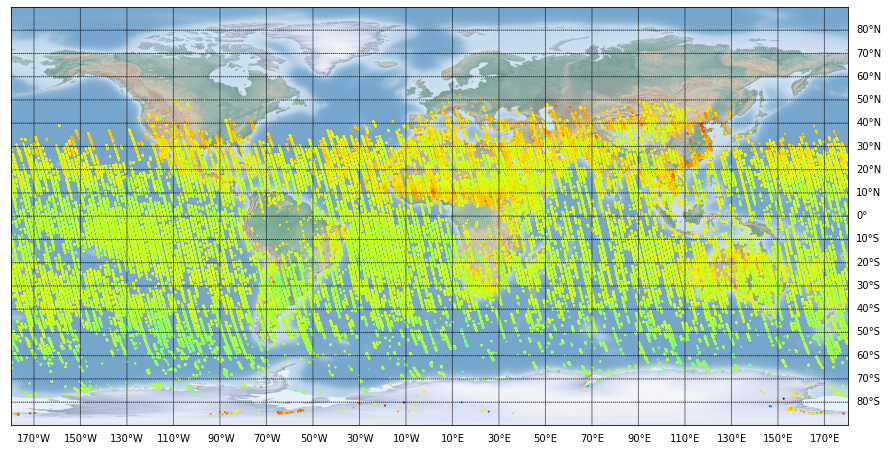

In [0]:
draw_map(data)

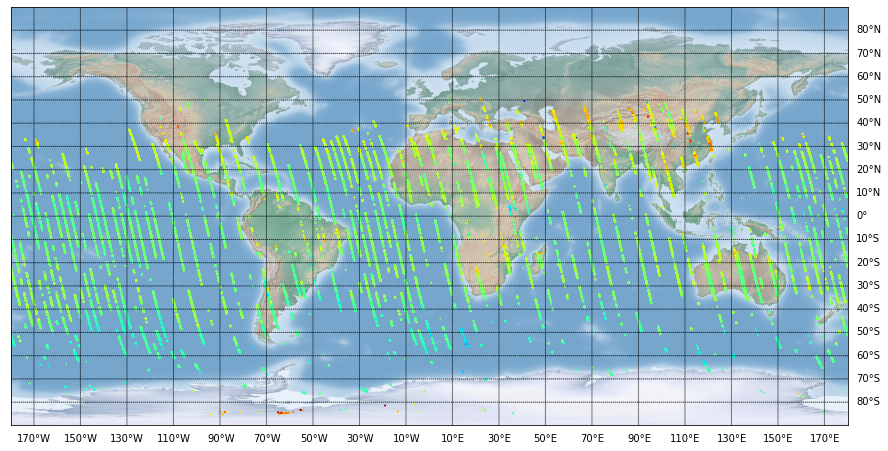

In [0]:
draw_map(data_1)

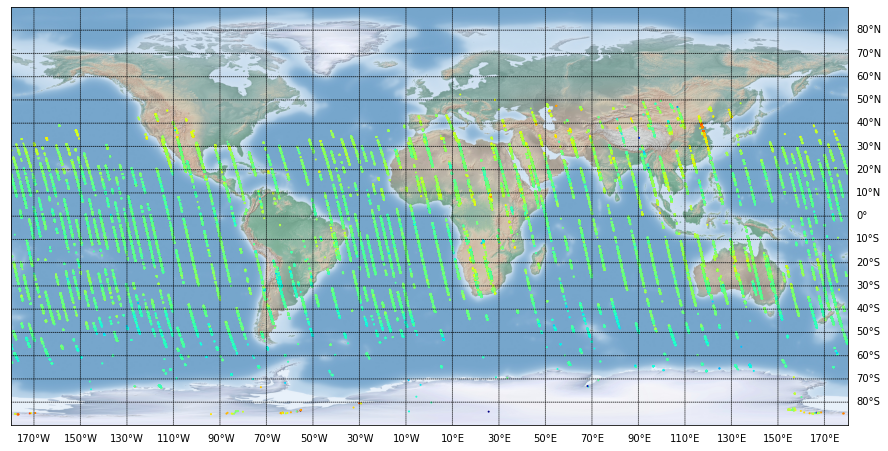

In [0]:
draw_map(data_2)

---

## Data for a Specific Zone

##### **get_data_zone**: retrieve the data for one specific zone.

Parameters:

*   (DataFrame) **data**: the origin dataset. 
*   (int) **lon_min** : the minimum longitude. *default: -180*
*   (int) **lon_max**: the maximum longitude. *default: 180*
*   (int) **lat_min**: the minimum latitude. *default: -90*
*   (int) **lat_max**: the maximum latitude. *default: 90*




In [0]:
def get_data_zone(data, lon_min=-180, lon_max=180, lat_min=-90, lat_max=90):
    data = data[data['longitude'] < lon_max]
    data = data[data['longitude'] > lon_min]
    data = data[data['latitude'] < lat_max]
    data = data[data['latitude'] > lat_min]
    return data

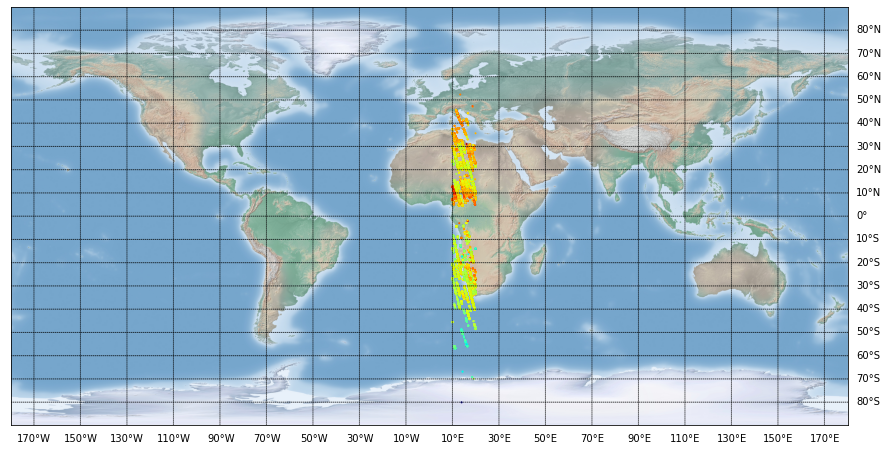

In [0]:
data_10_20 = get_data_zone(data, lon_min=10, lon_max=20, lat_min=-90, lat_max=90)
draw_map(data_10_20)

This can be interesting to study some points below the latitude -80.

These points appear to be anomalies since the measuement technique of the satellite is measuring the CO2 concentrations through spectroscopy (and therefore is dependant on light). Since there is few enlightment in this region, it is surprising to observe measurements there.

Number of observations in the -75° zone:  811


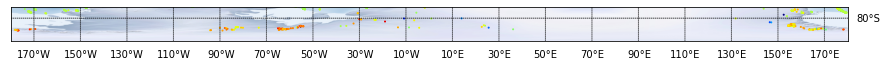

In [0]:
data_artctica = get_data_zone(data, lon_min=-180, lon_max=180, lat_min=-90, lat_max=-75)

print("Number of observations in the -75° zone: ", data_artctica.shape[0])

draw_map(data_artctica, lat_max=-75)

Let's zoom in a particular region:

Number of observations in the -75°:-70°-50° zone:  121


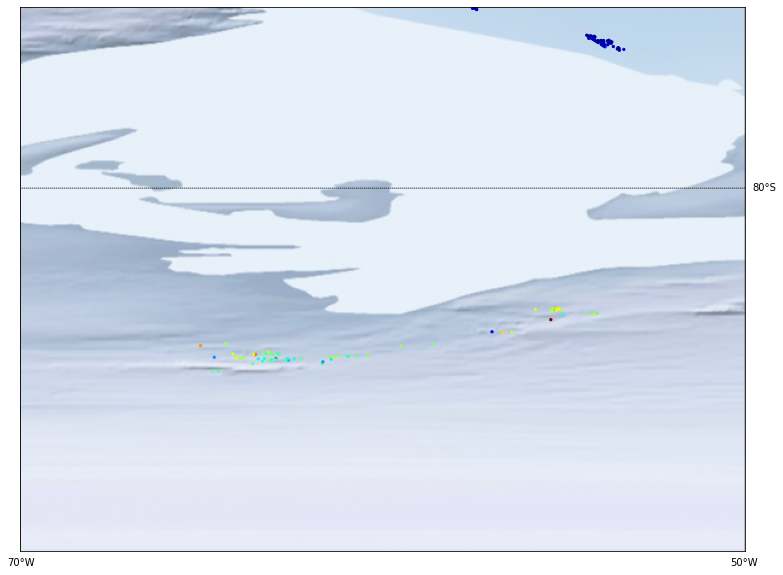

In [0]:
data_artctica = get_data_zone(data, lon_min=-70, lon_max=-50, lat_min=-90, lat_max=-75)

print("Number of observations in the -75°:-70°-50° zone: ", data_artctica.shape[0])

draw_map(data_artctica, lat_max=-75, lon_min=-70, lon_max=-50, size_point=5)

The same thing can be done over a specific country. Here we have the month data above India:

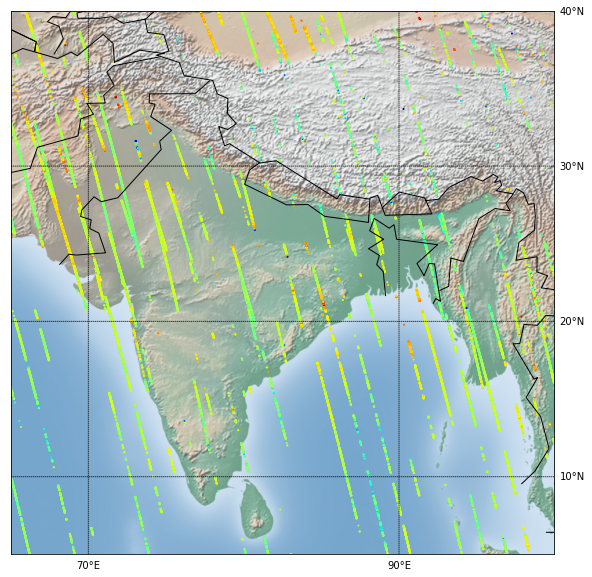

In [0]:
data_india = get_data_zone(data, lon_min=65, lon_max=100, lat_min=5, lat_max=40)
draw_map(data_india, lon_min=65, lon_max=100, lat_min=5, lat_max=40, frontier=True)

---

## Data Profiling and Anomaly Spotting

We can now explore the CO2 concentration values to get some insights on the distribution and spot some outsiders:

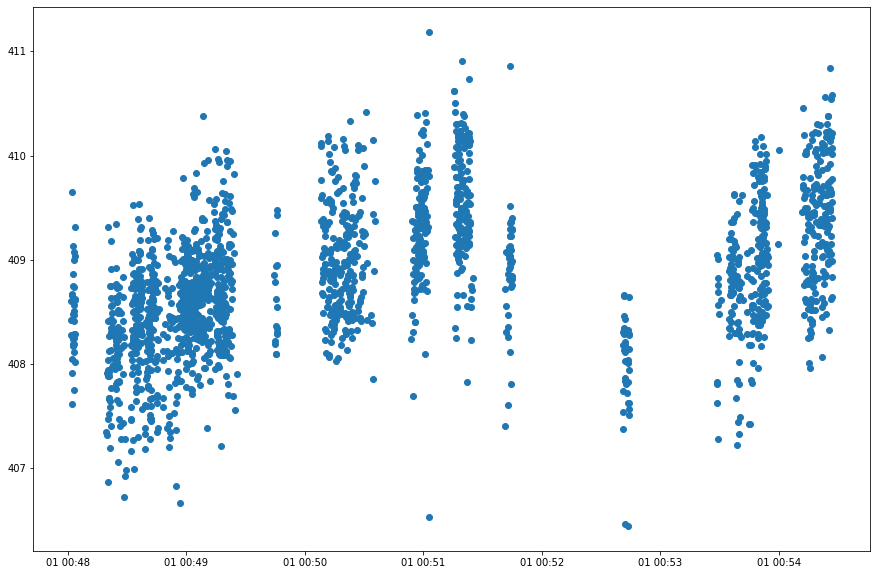

In [0]:
import matplotlib.pyplot as plt

data_test = data[10:2000]

plt.figure(figsize=(15, 10), edgecolor='w')
plt.scatter(data_test['date'], data_test['xco2'])

We have **2.53M entries**, ranging from **288 to 423**, with a **mean of 409**.


In [0]:
data['date'].describe()

count                        2528809
unique                       2528809
top       2019-12-21 20:30:44.310000
freq                               1
first     2019-12-01 00:40:14.750000
last      2019-12-31 22:46:49.080000
Name: date, dtype: object

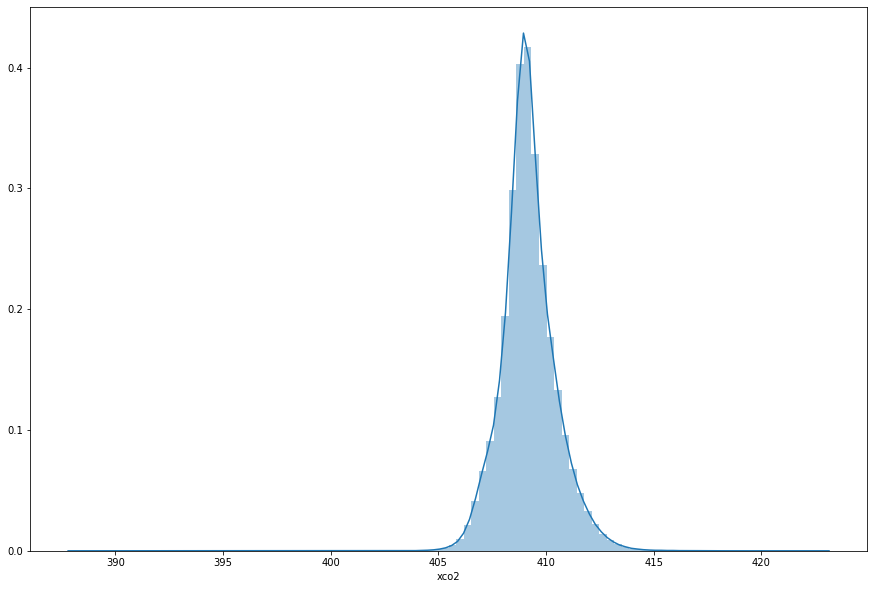

In [0]:
import seaborn as sns
plt.figure(figsize=(15, 10), edgecolor='w')
sns.distplot(data['xco2'], bins=100)

We can try to spot (and remove?) the outsider extremes that may be considered as anomalies.

We can see below an outsider above 420 and suprisingly low observations below 400:

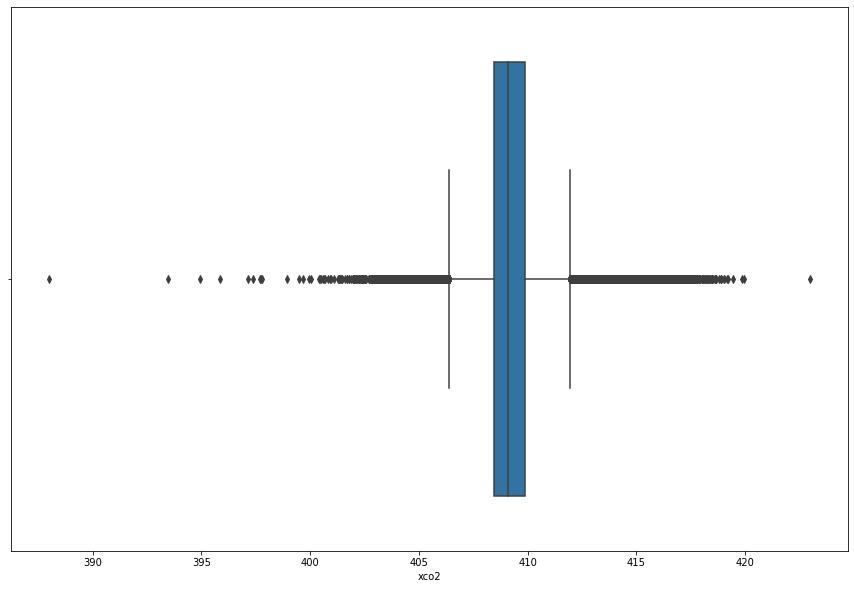

In [0]:
plt.figure(figsize=(15, 10), edgecolor='w')
sns.boxplot(data['xco2'])

We have: 

*   **01 obs above 420:** This seems to be an anomaly.
*   **13 obs below 400:** These may not all be anomalies since some of them make sense considering a gaussian distribution. 



In [0]:
print("Values above 420: \n", data[data['xco2'] > 420]['xco2'])
print("Values below 400: \n", data[data['xco2'] < 400]['xco2'])

Values above 420: 
 599013    422.96991
Name: xco2, dtype: float64
Values below 400: 
 367850     397.382385
507507     398.951752
650870     395.861664
955766     399.951538
967410     397.712036
1302053    397.126099
1312833    393.484985
1564802    397.753967
2239166    387.984375
2257075    397.789276
2257076    394.924622
2286446    399.652252
2498825    399.505096
Name: xco2, dtype: float64


---

## Visualize track pattern

The idea here is to consider only one orbit of the satellite in order to plot a track and find an anomaly pattern (cf. F. Chevallier paper for China).

First we need to visualize the splitted data:



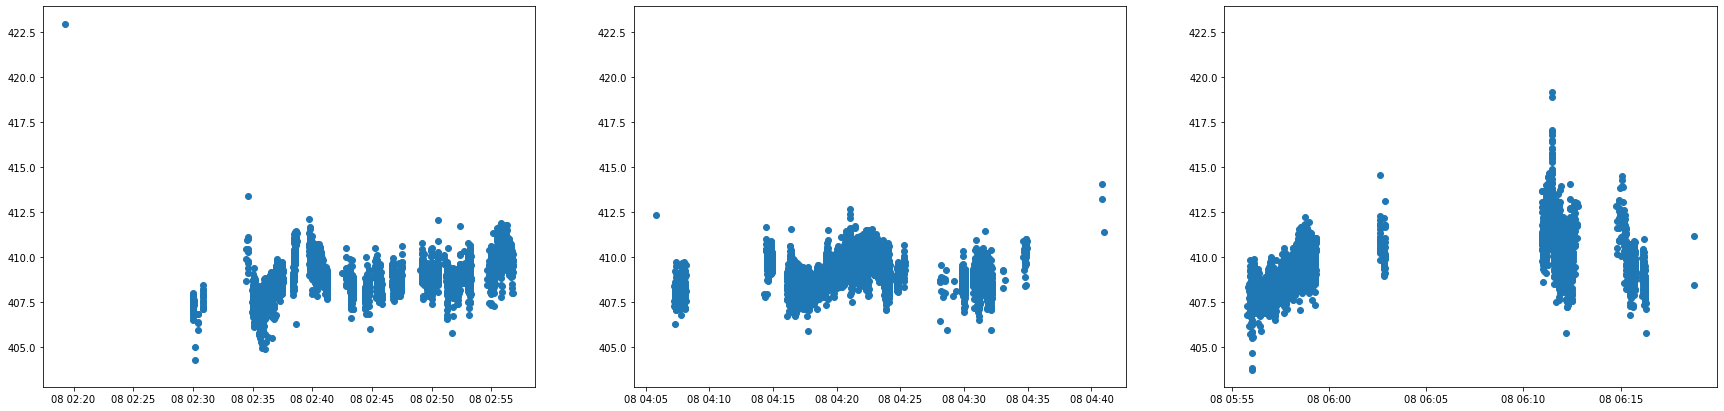

In [0]:
#Here we consider the 28904th orbit (6555 observations):
data_28904 = data[data['orbit'] == 28904]
#Here we consider the 28905th orbit:
data_28905 = data[data['orbit'] == 28905]
#Here we consider the 28906th orbit:
data_28906 = data[data['orbit'] == 28906]

plt.figure(figsize=(30, 7), edgecolor='w')
ax1 = plt.subplot(131, sharey=ax1)
plt.scatter(data_28904['date'], data_28904['xco2'])
ax2 = plt.subplot(132, sharey=ax1)
plt.scatter(data_28905['date'], data_28905['xco2'])
ax3 = plt.subplot(133, sharey=ax1)
plt.scatter(data_28906['date'], data_28906['xco2'])

##### **get_orbit_data**: retrieve all data points for a specific orbit

Parameters:

*   (DataFrame) **data**: the origin dataset. 
*   (int) **orbit**: the id of the wanted orbit.  *default: 28905*

Return:

*   (DataFrame) the dataset containing all the data points of the specified orbit.

In [0]:
def get_orbit_data(data, orbit=28905):
    return data[data['orbit'] == orbit]

get_orbit_data(data, 28960)

sounding_id   latitude  ...  orbit                    date
918479  2019121122384133 -84.843575  ...  28960 2019-12-11 22:38:41.330
918480  2019121122391308 -84.106491  ...  28960 2019-12-11 22:39:13.080
918481  2019121122391974 -83.839905  ...  28960 2019-12-11 22:39:19.740
918482  2019121122392004 -83.828697  ...  28960 2019-12-11 22:39:20.040
918483  2019121122392005 -83.840591  ...  28960 2019-12-11 22:39:20.050
...                  ...        ...  ...    ...                     ...
926056  2019121123135904  28.715212  ...  28960 2019-12-11 23:13:59.040
926057  2019121123135906  28.689960  ...  28960 2019-12-11 23:13:59.060
926058  2019121123135936  28.707779  ...  28960 2019-12-11 23:13:59.360
926059  2019121123135937  28.694929  ...  28960 2019-12-11 23:13:59.370
926060  2019121123135977  28.712656  ...  28960 2019-12-11 23:13:59.770

[7582 rows x 7 columns]

There seems to be:
* Some anomalies (observation high alone)
* Some noise (for the same line of observation)

It would be interesting to visualise these as a line. We could regroup temporal values to ther mean. To do so, we can regroup datapoints in time.

**`CAUTION:`** This "noise reduction" is too basic and needs to be improved !

##### **group_by_minute**: reduce the time resolution of a dataframe to the minute

Parameters:

*   (DataFrame) **data**: the origin dataset. 

Return:

*   (DataFrame) the transformed dataset. 




In [0]:
def group_by_minute(data):
    data['date'] = data['date'].astype('datetime64[m]')
    return data.groupby(['date']).mean()

data_28905_grouped = group_by_minute(data_28905)
data_28905_grouped.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



sounding_id   latitude  ...  xco2_uncert    orbit
date                                          ...                      
2019-12-08 04:05:00  2.019121e+15 -69.237373  ...     0.597179  28905.0
2019-12-08 04:07:00  2.019121e+15 -63.462181  ...     0.422398  28905.0
2019-12-08 04:08:00  2.019121e+15 -62.065236  ...     0.346995  28905.0
2019-12-08 04:14:00  2.019121e+15 -40.197575  ...     0.364700  28905.0
2019-12-08 04:16:00  2.019121e+15 -34.071424  ...     0.375947  28905.0

[5 rows x 6 columns]

##### Pair visualisation

We can now visualize the simplified data for the 28905th orbit. We notice that the overall shape is roughly kept.

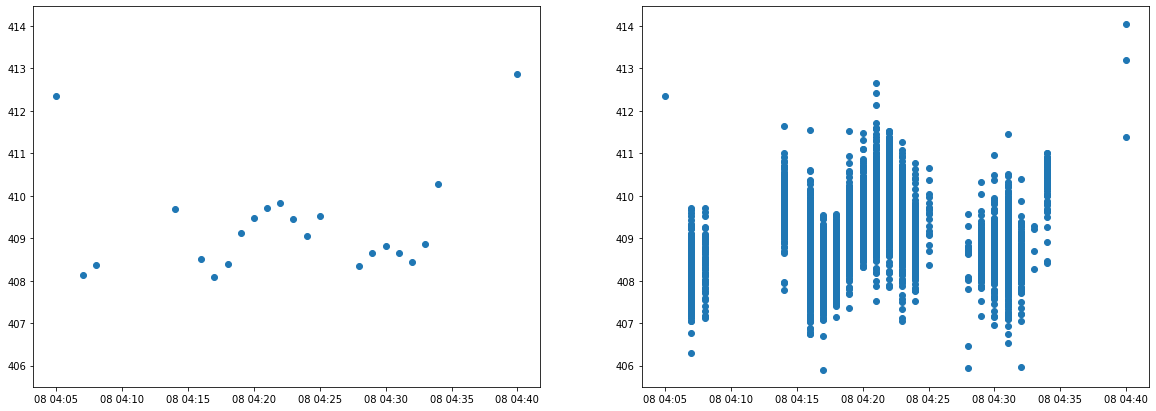

In [0]:
plt.figure(figsize=(20, 7), edgecolor='w')
ax1 = plt.subplot(121)
plt.scatter(grouped.index, y = grouped['xco2'])
ax2 = plt.subplot(122, sharex=ax1, sharey=ax1)
plt.scatter(data_28905['date'], data_28905['xco2'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



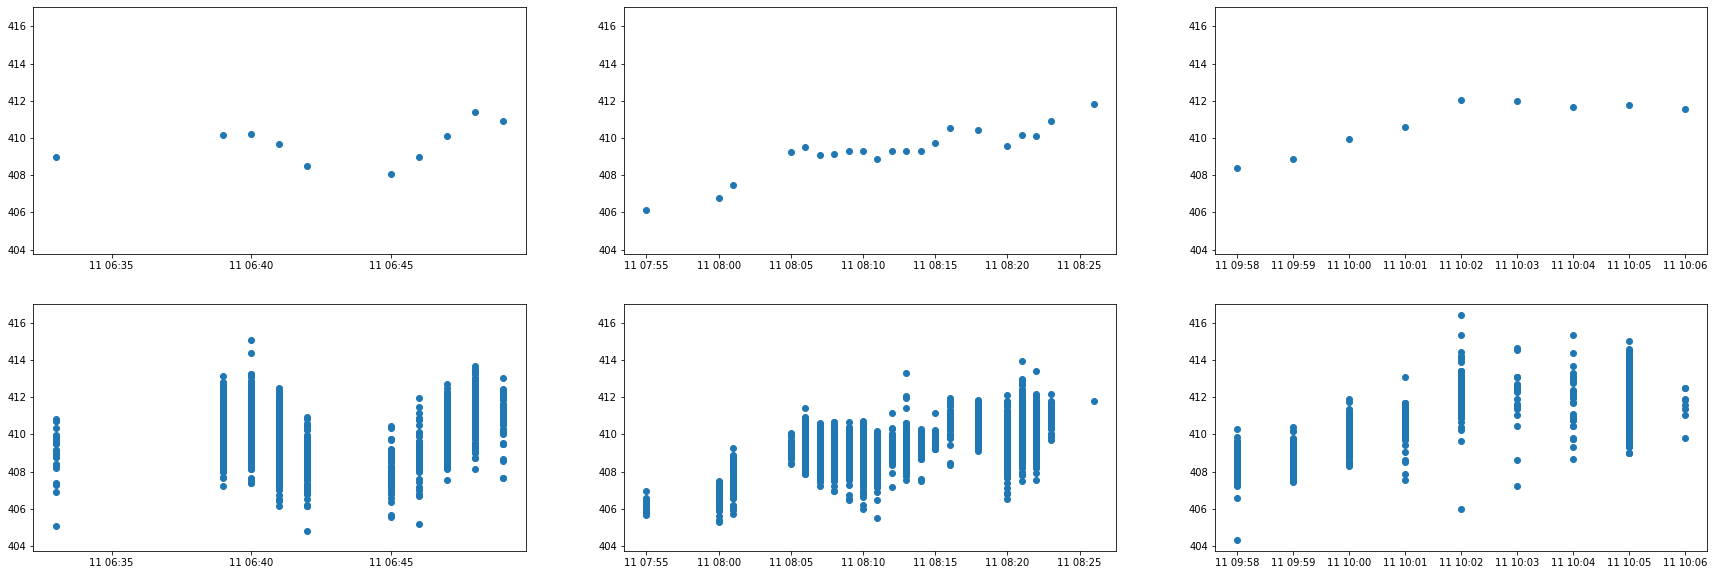

In [0]:
data_28950 = get_orbit_data(data, 28950)
data_28950_grouped = group_by_minute(data_28950)
data_28951 = get_orbit_data(data, 28951)
data_28951_grouped = group_by_minute(data_28951)
data_28952 = get_orbit_data(data, 28952)
data_28952_grouped = group_by_minute(data_28952)


plt.figure(figsize=(30, 10), edgecolor='w')

ax1 = plt.subplot(231)
plt.scatter(data_28950_grouped.index, data_28950_grouped['xco2'])
ax2 = plt.subplot(234, sharex=ax1, sharey=ax1)
plt.scatter(data_28950['date'], data_28950['xco2'])

ax3 = plt.subplot(232, sharey=ax1)
plt.scatter(data_28951_grouped.index, data_28951_grouped['xco2'])
ax4 = plt.subplot(235, sharex=ax3, sharey=ax3)
plt.scatter(data_28951['date'], data_28951['xco2'])

ax5 = plt.subplot(233, sharey=ax1)
plt.scatter(data_28952_grouped.index, data_28952_grouped['xco2'])
ax6 = plt.subplot(236, sharex=ax5, sharey=ax5)
plt.scatter(data_28952['date'], data_28952['xco2'])

---

## Apply the wind (reverse)

The observation of the CO2 concentration isn't done immediatly after the emission. Since the satellite has a 16-days "refreshing" period for a geographical point, the CO2 could have been emitted quite far from the place it has been measured.

One reason for that is that the wind is moving the air, so the CO2 particles. Therefore, it can be interesting to understand the where the CO2 particles could have been before being moved by the wind.

The wind data are available from the NASA and already compiled in the original OCO2 Dataset.

---

## Finding Peaks (Measurement Time)

We can try to find spikes in the distibution. By looking directly at the difference between a point and its predecessor, we can't get any useful information, due to the noise.

The idea would be to look at the neighbouring distribution to spot a local peak...

`// TODO`

In [0]:
from scipy.signal import find_peaks 

peaks, _ = find_peaks(data['xco2'][:500], threshold=1)

plt.figure(figsize=(15, 10), edgecolor='w')
plt.scatter(data['date'], data['xco2'])
plt.scatter(peaks, data['xco2'][:500][peaks], linewidth=0.3, s=50, c='r')

#print(data['xco2'][peaks-1], " -> ", data['xco2'][peaks])

If we take into consideration the fact that two close peaks are in fact one only phenomenon (due to the noise), we would rather try to find global peaks.

The distance here is choosen empirically to visually match the obsrevation.

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


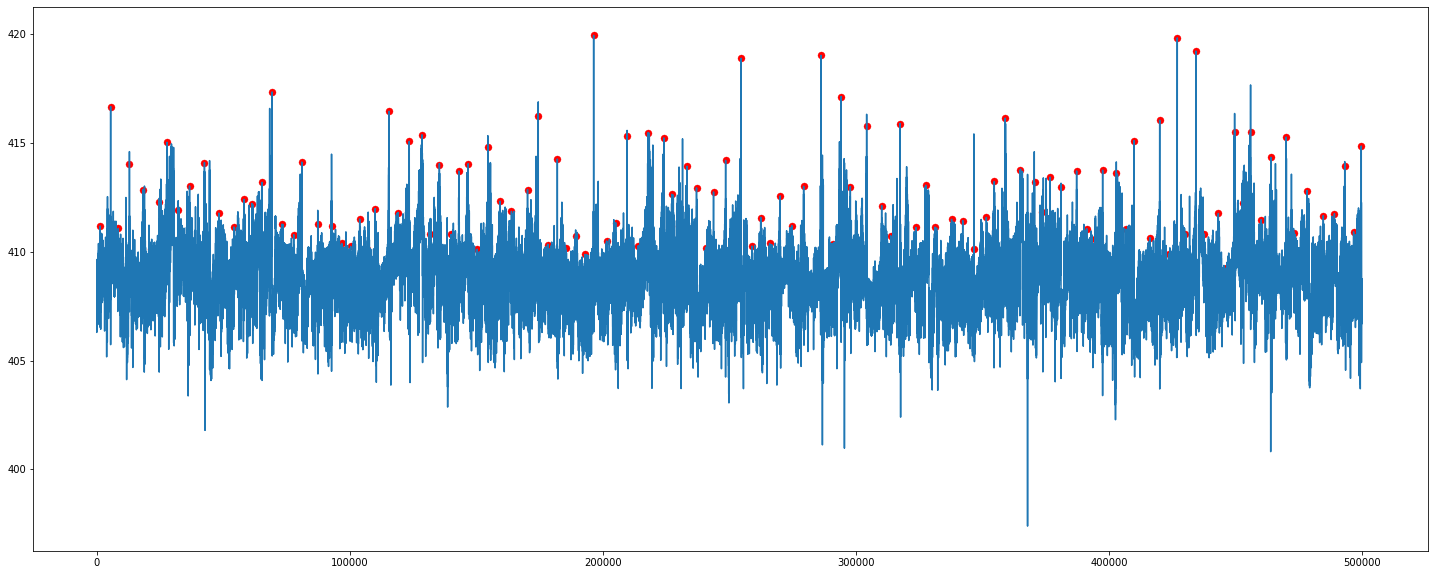

In [0]:
peaks, _ = find_peaks(data['xco2'], threshold=1, distance=3000)

plt.figure(figsize=(25, 10), edgecolor='w')
plt.plot(data['xco2'][:500000])
plt.scatter(peaks, data['xco2'][:500000][peaks], linewidth=0.3, s=50, c='r')

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:1146: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


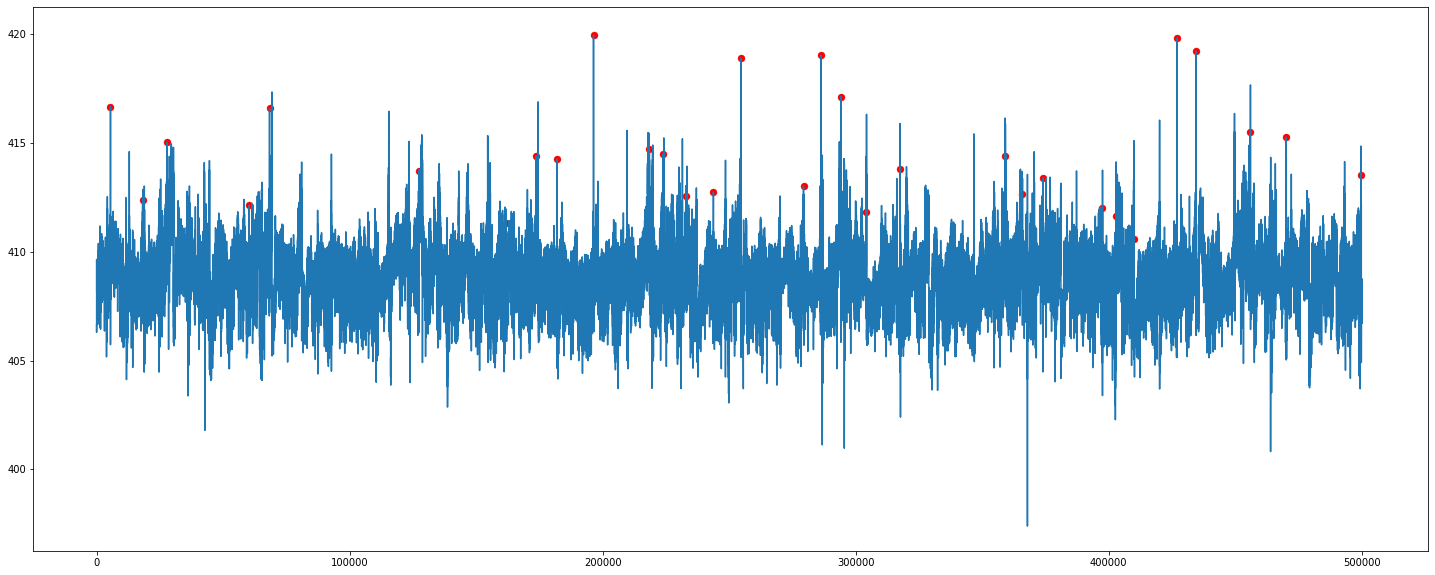

In [0]:
peaks, _ = find_peaks(data['xco2'], threshold=3, distance=5000)

plt.figure(figsize=(25, 10), edgecolor='w')
plt.plot(data['xco2'][:500000])
plt.scatter(peaks, data['xco2'][:500000][peaks], linewidth=0.3, s=50, c='r')


## Finding peaks (Space)

The idea is to find peaks on a space-related basis (Longitude & Latitude).

If a value is significantly high compared to neigbouhring values, we can assume it is either an emission peak or a measurement anomaly. In both cases it isinteresting to dig deeper.

## Finding peaks (Local Time)

The idea is to spot peaks in a region over a large period (eg. a month or a year).

This can be done by comparing the previous yealy values (problem: few obs) or monthly values (problem: carbon cycle).

---

## Data Cleaning and Curation

---

---



# Junk Code

In [0]:
#m.scatter(data_1['longitude'], data_1['latitude'], c=data_1['xco2'], cmap=plt.cm.jet, s=1)

In [0]:
lon = data['longitude'][:]
lat = data['latitude'][:]
CO2 = data['xco2'][:]

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

m = Basemap(llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)

plt.figure(figsize=(15, 10), edgecolor='w')
m.shadedrelief()
m.scatter(lon, lat, s=1, c=CO2, cmap=plt.cm.jet, alpha=0.5)

In [0]:
for index,row in data[:25].iterrows():
    row['date'] = datetime.strptime(str(row['sounding_id']), '%Y%m%d%H%M%S%f')

data.head()


In [0]:

plt.plot(data['xco2'])
plt.scatter(c_max_index[0],data['xco2'][c_max_index[0]],linewidth=0.3, s=50, c='r')

In [0]:
# Reducing the datetime precision by the minute:
data_28905['date'] = data_28905['date'].astype('datetime64[m]')
data_28906['date'] = data_28906['date'].apply(lambda x: x.replace(microsecond=0))
data_28906['date'] = data_28906['date'].apply(lambda x: x.replace(second=x.second[:1]))
grouped = data_28905.groupby(['date']).mean()

grouped.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



TypeError: ignored